# Exercise 8

## Car Price Prediction

Predict if the price of a car is low or high

- Nelson Aldana 20194128
- Maxwell Calderon 201920519
- Diana Diaz 201331684
- John Florez 201920529

In [1]:
%matplotlib inline
import pandas as pd
import numpy as np

data = pd.read_csv('dataTrain_carListings.zip')
data = data.loc[data['Model'].str.contains('Camry')].drop(['Make', 'State'], axis=1)
data = data.join(pd.get_dummies(data['Model'], prefix='M'))
data['HighPrice'] = (data['Price'] > data['Price'].mean()).astype(int)
data = data.drop(['Model', 'Price'], axis=1)

data.head()

,Year,Mileage,M_Camry,M_Camry4dr,M_CamryBase,M_CamryL,M_CamryLE,M_CamrySE,M_CamryXLE,HighPrice
15,2016,29242,0,0,0,0,1,0,0,1
47,2015,26465,0,0,0,0,1,0,0,1
85,2012,46739,0,1,0,0,0,0,0,1
141,2017,41722,0,0,0,0,0,1,0,1
226,2014,77669,0,0,0,0,0,0,1,0


In [2]:
data.shape

(13150, 10)

In [3]:
y = data['HighPrice']
X = data.drop(['HighPrice'], axis=1)

In [4]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)
train,test=train_test_split(data,test_size=0.33,random_state=42)

# Exercise 8.1

Estimate a Decision Tree Classifier Manually using the code created in the Notebook #4

Evaluate the accuracy on the testing set

#### Respuesta:  
El siguiente es el árbol de clasificación manual, el cual nos permite un accuracy 0.86

In [5]:
max_depth = None
num_pct = 10
max_features = None
min_gain=0.001

def gini(y):
    if y.shape[0] == 0:
        return 0
    else:
        return 1 - (y.mean()**2 + (1 - y.mean())**2)
    
def gini_impurity(X_col, y, split):
    "Calculate the gain of an split k on feature j"
    
    filter_l = X_col < split
    y_l = y.loc[filter_l]
    y_r = y.loc[~filter_l]
    
    n_l = y_l.shape[0]
    n_r = y_r.shape[0]
    
    gini_y = gini(y)
    gini_l = gini(y_l)
    gini_r = gini(y_r)
    
    gini_impurity_ = gini_y - (n_l / (n_l + n_r) * gini_l + n_r / (n_l + n_r) * gini_r)
    
    return gini_impurity_

def best_split(X, y, num_pct=10):
    
    features = range(X.shape[1])
    
    best_split = [0, 0, 0]  # j, split, gain
    
    # For all features
    for j in features:
        
        splits = np.percentile(X.iloc[:, j], np.arange(0, 100, 100.0 / (num_pct+1)).tolist())
        splits = np.unique(splits)[1:]
        
        # For all splits
        for split in splits:
            gain = gini_impurity(X.iloc[:, j], y, split)
                        
            if gain > best_split[2]:
                best_split = [j, split, gain]
    
    return best_split

def tree_grow(X, y, level=0, min_gain=0.001, max_depth=None, num_pct=10):
    
    # If only one observation
    if X.shape[0] == 1:
        tree = dict(y_pred=y.iloc[:1].values[0], y_prob=0.5, level=level, split=-1, n_samples=1, gain=0)
        return tree
    
    # Calculate the best split
    j, split, gain = best_split(X, y, num_pct)
    
    # save tree and estimate prediction
    y_pred = int(y.mean() >= 0.5) 
    y_prob = (y.sum() + 1.0) / (y.shape[0] + 2.0)  # Laplace correction
    
    tree = dict(y_pred=y_pred, y_prob=y_prob, level=level, split=-1, n_samples=X.shape[0], gain=gain)
    
    # Check stooping criteria
    if gain < min_gain:
        return tree
    if max_depth is not None:
        if level >= max_depth:
            return tree   
    
    # No stooping criteria was meet, then continue to create the partition
    filter_l = X.iloc[:, j] < split
    X_l, y_l = X.loc[filter_l], y.loc[filter_l]
    X_r, y_r = X.loc[~filter_l], y.loc[~filter_l]
    tree['split'] = [j, split]

    # Next iteration to each split
    
    tree['sl'] = tree_grow(X_l, y_l, level + 1, min_gain=min_gain, max_depth=max_depth, num_pct=num_pct)
    tree['sr'] = tree_grow(X_r, y_r, level + 1, min_gain=min_gain, max_depth=max_depth, num_pct=num_pct)
    
    return tree

In [6]:
tree = tree_grow(X_train,y_train,max_depth=3)
tree

{'y_pred': 1,
 'y_prob': 0.5780753517930095,
 'level': 0,
 'split': [1, 52187.63636363637],
 'n_samples': 8810,
 'gain': 0.23872134898880762,
 'sl': {'y_pred': 1,
  'y_prob': 0.8391583452211127,
  'level': 1,
  'split': [0, 2014.0],
  'n_samples': 5606,
  'gain': 0.03317687167496233,
  'sl': {'y_pred': 0,
   'y_prob': 0.36828644501278773,
   'level': 2,
   'split': [0, 2012.0],
   'n_samples': 389,
   'gain': 0.05908490521197157,
   'sl': {'y_pred': 0,
    'y_prob': 0.08,
    'level': 3,
    'split': -1,
    'n_samples': 98,
    'gain': 0.01707452211653898},
   'sr': {'y_pred': 0,
    'y_prob': 0.46757679180887374,
    'level': 3,
    'split': -1,
    'n_samples': 291,
    'gain': 0.036947257392555666}},
  'sr': {'y_pred': 1,
   'y_prob': 0.8743054224947308,
   'level': 2,
   'split': [0, 2015.0],
   'n_samples': 5217,
   'gain': 0.014933378976312917,
   'sl': {'y_pred': 1,
    'y_prob': 0.7348484848484849,
    'level': 3,
    'split': -1,
    'n_samples': 1450,
    'gain': 0.024495220

In [7]:
def tree_predict(X, tree, proba=False):
    
    predicted = np.ones(X.shape[0])

    # Check if final node
    if tree['split'] == -1:
        if not proba:
            predicted = predicted * tree['y_pred']
        else:
            predicted = predicted * tree['y_prob']
            
    else:
        
        j, split = tree['split']
        filter_l = (X.iloc[:, j] < split)
        X_l = X.loc[filter_l]
        X_r = X.loc[~filter_l]

        if X_l.shape[0] == 0:  # If left node is empty only continue with right
            predicted[~filter_l] = tree_predict(X_r, tree['sr'], proba)
        elif X_r.shape[0] == 0:  # If right node is empty only continue with left
            predicted[filter_l] = tree_predict(X_l, tree['sl'], proba)
        else:
            predicted[filter_l] = tree_predict(X_l, tree['sl'], proba)
            predicted[~filter_l] = tree_predict(X_r, tree['sr'], proba)

    return predicted    

In [8]:
y_pred=tree_predict(X_test,tree)

In [9]:
#Obteniendo el Accuracy
from sklearn import metrics
metrics.accuracy_score(y_pred, y_test)

0.8610599078341014

In [14]:
metrics.f1_score(y_pred, y_test)

0.8904888215233042

# Exercise 8.2

Estimate a Bagging of 10 Decision Tree Classifiers Manually using the code created in the Notebook #5

Evaluate the accuracy on the testing set

#### Respuesta:

Con este modelo se obtiene un f1 score de 0.89 y un accuracy de 0.86; estos resultados no son sustancialmente diferentes a los obtenidos con el árbol de clasificación manula, el cual tiene estadísticas de desempeño similares. 


In [10]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)
train,test=train_test_split(data,test_size=0.33,random_state=42)

n_samples = X_train.shape[0]
n_B = 10

samples = [np.random.choice(a=n_samples, size=n_samples, replace=True) for _ in range(1, n_B +1 )]
samples

[array([7460, 7026, 1292, ..., 3025, 7852, 4661]),
 array([ 741, 1669,  236, ..., 2999, 1537, 3302]),
 array([7367, 1873, 2044, ..., 1489, 1946, 7898]),
 array([  86, 8432, 6318, ..., 7684, 6451, 8241]),
 array([1662, 4035, 5456, ..., 6390, 5066, 7226]),
 array([7436,  899, 1234, ...,  334,  669, 5496]),
 array([8480, 7506, 2939, ..., 3858,  533, 2273]),
 array([3865,  915, 7005, ..., 8685, 8399, 5015]),
 array([8253, 3031, 5416, ..., 1660, 7835, 7371]),
 array([ 262, 4443, 7392, ..., 8792, 7381, 2956])]

In [11]:
y_pred1=pd.DataFrame()
for i, sample in enumerate(samples):
    X_train1 = X_train.iloc[sample]
    y_train1 = y_train.iloc[sample]
    tree = tree_grow(X_train1,y_train1,max_depth=3)
    y_pred = pd.DataFrame(tree_predict(X_test,tree))
    y_pred1[i]=y_pred[0]

In [12]:
y_pred1

,0,1,2,3,4,5,6,7,8,9
0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0
1,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
2,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
3,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...
4335,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
4336,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4337,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
4338,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0


In [13]:
y_pred1 = (y_pred1.sum(axis=1) >= (n_B / 2)).astype(np.int)

from sklearn import metrics
metrics.f1_score(y_pred1, y_test), metrics.accuracy_score(y_pred1, y_test)

(0.8921458098459226, 0.867741935483871)

# Exercise 8.3

Implement the variable max_features on the Decision Tree Classifier created in 11.1.

Compare the impact in the results by varing the parameter max_features

Evaluate the accuracy on the testing set

### Respuesta: 
Los valores del accuracy se mueven entre 0.84 y 0.86, mostrando no hay mejora importante frente a los modelos anteriores. 

In [16]:
def tree_grow_max_features(X, y, level=0, min_gain=0.001, max_depth=None, num_pct=10,max_features=None):
    
    # If only one observation
    if X.shape[0] == 1:
        tree = dict(y_pred=y.iloc[:1].values[0], y_prob=0.5, level=level, split=-1, n_samples=1, gain=0)
        return tree
    
    #Selecting the max_features to evaluate
    X_random=X.sample(max_features, axis=1)
    
    # Calculate the best split
    j_random, split, gain = best_split(X_random, y, num_pct)
    
    j=X.columns.get_loc(X_random.columns[j_random])
    
    # save tree and estimate prediction
    y_pred = int(y.mean() >= 0.5) 
    y_prob = (y.sum() + 1.0) / (y.shape[0] + 2.0)  # Laplace correction
    
    tree = dict(y_pred=y_pred, y_prob=y_prob, level=level, split=-1, n_samples=X.shape[0], gain=gain)
    
    # Check stooping criteria
    if gain < min_gain:
        return tree
    if max_depth is not None:
        if level >= max_depth:
            return tree   
    
    # No stooping criteria was meet, then continue to create the partition
    filter_l = X.iloc[:, j] < split
    X_l, y_l = X.loc[filter_l], y.loc[filter_l]
    X_r, y_r = X.loc[~filter_l], y.loc[~filter_l]
    tree['split'] = [j, split]

    # Next iteration to each split
    
    tree['sl'] = tree_grow_max_features(X_l, y_l, level + 1, min_gain=min_gain, max_depth=max_depth, num_pct=num_pct,max_features=max_features)
    tree['sr'] = tree_grow_max_features(X_r, y_r, level + 1, min_gain=min_gain, max_depth=max_depth, num_pct=num_pct,max_features=max_features)
    
    return tree

In [19]:
trees_accurracy=list()
for i in range(1,9):
    tree=tree_grow_max_features(X_train,y_train,level=0, min_gain=0.001, max_depth=3, num_pct=10,max_features=i)
    y_pred=tree_predict(X_test,tree)
    trees_accurracy.append(metrics.accuracy_score(y_pred, y_test))
    
trees_accurracy

[0.8414746543778802,
 0.8610599078341014,
 0.8502304147465438,
 0.8543778801843318,
 0.8495391705069124,
 0.8691244239631336,
 0.8679723502304147,
 0.8610599078341014]

# Exercise 8.4

Estimate a Bagging of 10 Decision Tree Classifiers with `max_features = log(n_features)`

Evaluate the accuracy on the testing set

### Respuesta:

Con este modelo se obtienen un f1-score de 0.86 y un accuracy de 0.84, con lo que se obtiene una desmejora de los resultados con relación a los anteriores modelos, que tienen un f1-score y un accuracy más altos. 

In [21]:
n_samples = train.shape[0]
n_B = 10

X_train = train.iloc[:, 0:8]
X_test = test.iloc[:, 0:8]
y_train = train.HighPrice
y_test = test.HighPrice

# create ten bootstrap samples (will be used to select rows from the DataFrame)
samples = [np.random.choice(a=n_samples, size=n_samples, replace=True) for _ in range(1, n_B +1 )]
samples

[array([ 703, 4491, 4795, ..., 2642, 6315, 8565]),
 array([  82, 7764, 7597, ..., 5641,  610,  583]),
 array([7471, 2577, 8719, ...,   87, 3497, 7841]),
 array([4674, 7775, 1110, ..., 5890, 1145, 7006]),
 array([ 313, 4954, 3483, ..., 6587, 3142, 7280]),
 array([1809, 8129, 8127, ..., 6963, 3655, 1509]),
 array([3749, 1421, 5176, ..., 4995, 7768, 3228]),
 array([4788, 7350, 2418, ..., 4175, 2069,  767]),
 array([2757, 8069, 3635, ..., 2811, 1023, 5459]),
 array([6495, 7795, 8269, ..., 7099, 3290, 7048])]

In [23]:
from sklearn.tree import DecisionTreeClassifier
n_features=9

# grow each tree deep
treeclass = DecisionTreeClassifier(max_depth=None,max_features = 2,random_state=123)

# DataFrame for storing predicted price from each tree
y_pred = pd.DataFrame(index=test.index, columns=[list(range(n_B))])

# grow one tree for each bootstrap sample and make predictions on testing data
for i, sample in enumerate(samples):
    X_train = train.iloc[sample, 0:8]
    y_train = train.iloc[sample, 9]
    treeclass.fit(X_train, y_train)
    y_pred[[i]] = treeclass.predict(X_test)

In [24]:
from sklearn.metrics import mean_squared_error
for i in range(n_B):
    print(i, np.sqrt(mean_squared_error(y_pred[[i]], y_test)))

0 0.41180730136341825
1 0.4090001295730643
2 0.4090001295730643
3 0.40984429998526845
4 0.4081542131978452
5 0.4101253039949602
6 0.41570549660526995
7 0.4106867352009876
8 0.40560587894193306
9 0.3981524150650349


In [25]:
y_pred.mean(axis=1)

332784    0.4
146436    1.0
130476    1.0
85618     1.0
75474     0.0
         ... 
244795    1.0
366403    0.0
269482    1.0
5010      1.0
310628    0.0
Length: 4340, dtype: float64

In [26]:
np.sqrt(mean_squared_error(y_test, y_pred.mean(axis=1)))

0.3507792510244994

In [27]:
y_pred = (y_pred.sum(axis=1) >= (n_B / 2)).astype(np.int)

from sklearn import metrics
metrics.f1_score(y_pred, y_test), metrics.accuracy_score(y_pred, y_test)

(0.865076261243645, 0.8410138248847926)

# Exercise 8.5

Using sklearn, train a RandomForestClassifier

Evaluate the accuracy on the testing set

#### Respuesta

El random forest classifier tiene un accuracy de 0.84.

In [5]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from sklearn import metrics

from sklearn.metrics import precision_recall_curve

In [6]:
clf = RandomForestClassifier(n_estimators=200, random_state=1, n_jobs=-1)
clf.fit(X_train, y_train)


RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=200,
                       n_jobs=-1, oob_score=False, random_state=1, verbose=0,
                       warm_start=False)

In [7]:
y_pred_clf = clf.predict(X_test)

In [8]:
error = metrics.accuracy_score(y_pred_clf, y_test)
print('Accuracy: %.3f' % error)

Accuracy: 0.838


# Exercise 8.6

Find the best parameters of the RandomForestClassifier (max_depth, max_features, n_estimators)

Evaluate the accuracy on the testing set

### Respuesta:

De acuerdo  con la gráfica 1, se observa que con n_estimator < 40 se obtiene el mejor accuracy, entonces acotamos en ese rango
y se obtiene que con n_estimator < 15 se máximiza el accuracy (Ver gráfica 2). Luego,  la mejor estimación se da con 7 estimadores y corresponde a un accuracy 0.841. 

En el paso de la búsqueda del depth óptimo se obtiene que con la mejor estimación se da con 7 estimadores, 
con 9 features, con 5 en la niveles de profundidad  y corresponde a un accuracy 0.882.

Sobre los datos de prueba, el accuracy es de 0.87, mostrando que este modelo es mejor que los anteriores. 



In [9]:
X_train, X_test, y_train, y_test
X_test.head()

,Year,Mileage,M_Camry,M_Camry4dr,M_CamryBase,M_CamryL,M_CamryLE,M_CamrySE,M_CamryXLE
332784,2012,37294,0,1,0,0,0,0,0
146436,2015,45405,0,0,0,0,0,1,0
130476,2016,30648,0,0,0,0,0,1,0
85618,2015,27313,0,0,0,0,0,1,0
75474,2009,123815,0,1,0,0,0,0,0


### Calculamos los Estimadores Optimos

In [10]:
# list of values to try for n_estimators
estimator_range = range(1, 310, 10)

# list to store the average Accuracy for each value of n_estimators
accuracy_scores = []

# use 5-fold cross-validation with each value of n_estimators (WARNING: SLOW!)
for estimator in estimator_range:
    clf = RandomForestClassifier(n_estimators=estimator, random_state=1, n_jobs=-1)
    accuracy_scores.append(cross_val_score(clf, X, y, cv=5, scoring='accuracy').mean())

#### Gráfica 1

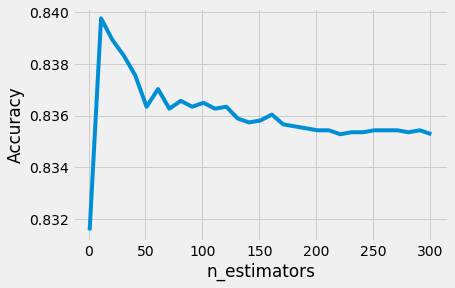

In [11]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

plt.plot(estimator_range, accuracy_scores)
plt.xlabel('n_estimators')
plt.ylabel('Accuracy');

#### Con menos de 40 modelos (Estimadores) se llega a  un mayor accuary.

In [12]:
# list of values to try for n_estimators
estimator_range = range(1, 40, 5)

# list to store the average Accuracy for each value of n_estimators
accuracy_scores = []

# use 5-fold cross-validation with each value of n_estimators (WARNING: SLOW!)
for estimator in estimator_range:
    clf = RandomForestClassifier(n_estimators=estimator, random_state=1, n_jobs=-1)
    accuracy_scores.append(cross_val_score(clf, X, y, cv=5, scoring='accuracy').mean())

#### Gráfica 2

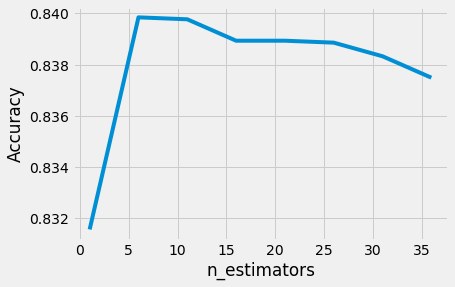

In [13]:
plt.plot(estimator_range, accuracy_scores)
plt.xlabel('n_estimators')
plt.ylabel('Accuracy');

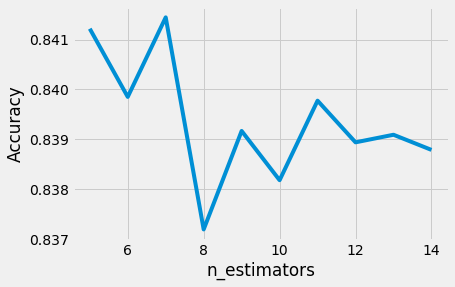

In [14]:
# list of values to try for n_estimators
estimator_range = range(5, 15, 1)

# list to store the average Accuracy for each value of n_estimators
accuracy_scores = []

# use 5-fold cross-validation with each value of n_estimators (WARNING: SLOW!)
for estimator in estimator_range:
    clf = RandomForestClassifier(n_estimators=estimator, random_state=1, n_jobs=-1)
    accuracy_scores.append(cross_val_score(clf, X, y, cv=5, scoring='accuracy').mean())
    
plt.plot(estimator_range, accuracy_scores)
plt.xlabel('n_estimators')
plt.ylabel('Accuracy');

In [15]:
max_Accuracy = np.max(accuracy_scores) 
max_Accuracy

0.8414448669201521

In [16]:
estimador = 0
for i in range(len(accuracy_scores)):
    if (accuracy_scores[i] >= max_Accuracy):
        estimador = i + estimator_range[0]

print('La mejor estimación se da con %.0f estimadores y corresponde a un accuracy %.3f ' % (estimador, max_Accuracy))

La mejor estimación se da con 7 estimadores y corresponde a un accuracy 0.841 


### Calculamos los Features Optimos

In [19]:
feature_cols = X.columns
feature_cols

Index(['Year', 'Mileage', 'M_Camry', 'M_Camry4dr', 'M_CamryBase', 'M_CamryL',
       'M_CamryLE', 'M_CamrySE', 'M_CamryXLE'],
      dtype='object')

In [20]:
# list of values to try for max_features
feature_range = range(1, len(feature_cols)+1)

# list to store the average Accuracy for each value of max_features
accuracy_scores = []

# use 10-fold cross-validation with each value of max_features (WARNING: SLOW!)
for feature in feature_range:
    clf = RandomForestClassifier(n_estimators=estimador, max_features=feature, random_state=1, n_jobs=-1)
    accuracy_scores.append(cross_val_score(clf, X, y, cv=5, scoring='accuracy').mean())

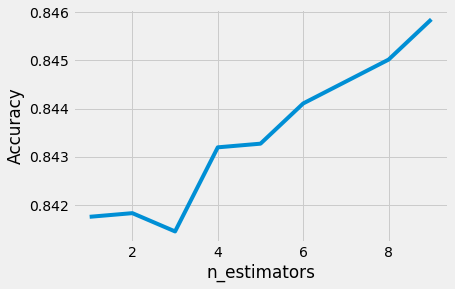

In [21]:
plt.plot(feature_range, accuracy_scores)
plt.xlabel('n_estimators')
plt.ylabel('Accuracy');

In [22]:
max_Accuracy = np.max(accuracy_scores) 
max_Accuracy

0.8458555133079848

In [23]:
feature = 0
for i in range(len(accuracy_scores)):
    if (accuracy_scores[i] >= max_Accuracy):
        feature = i + feature_range[0]

print('La mejor estimación se da con %.0f estimadores, con %.0f features y corresponde a un accuracy %.3f' % (estimador , feature, max_Accuracy))

La mejor estimación se da con 7 estimadores, con 9 features y corresponde a un accuracy 0.846


### Calculamos el Depth optimo

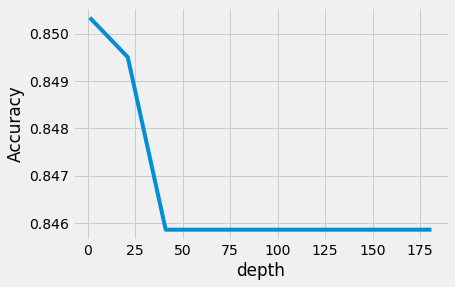

In [24]:
# list of values to try for n_estimators
estimator_depth = range(1, 200, 20)

# list to store the average Accuracy for each value of n_estimators
accuracy_scores = []

# use 5-fold cross-validation with each value of n_estimators (WARNING: SLOW!)
for depth in estimator_depth:
    clf = RandomForestClassifier(n_estimators=7, max_features=feature, max_depth=depth,  random_state=1, n_jobs=-1)
    accuracy_scores.append(cross_val_score(clf, X, y, cv=5, scoring='accuracy').mean())
    
plt.plot(estimator_depth, accuracy_scores)
plt.xlabel('depth')
plt.ylabel('Accuracy'); 

In [25]:
max_Accuracy = np.max(accuracy_scores) 
max_Accuracy

0.850342205323194

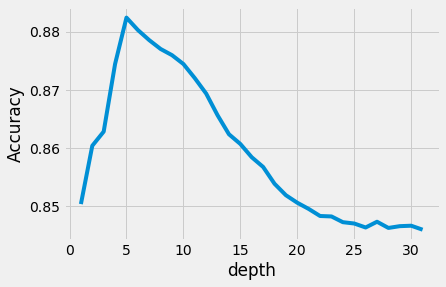

In [26]:
# list of values to try for n_estimators
estimator_depth = range(1,  32 , 1)

# list to store the average Accuracy for each value of n_estimators
accuracy_scores = []

# use 5-fold cross-validation with each value of n_estimators (WARNING: SLOW!)
for depth in estimator_depth:
    clf = RandomForestClassifier(n_estimators=7, max_features=feature, max_depth=depth,  random_state=1, n_jobs=-1)
    accuracy_scores.append(cross_val_score(clf, X, y, cv=5, scoring='accuracy').mean())
    
plt.plot(estimator_depth, accuracy_scores)
plt.xlabel('depth')
plt.ylabel('Accuracy'); 

In [27]:
max_Accuracy = np.max(accuracy_scores) 
max_Accuracy

0.8824334600760457

In [28]:
depth = 0
for i in range(len(accuracy_scores)):
    if (accuracy_scores[i] >= max_Accuracy):
        depth = i + feature_range[0]

print('La mejor estimación se da con %.0f estimadores, con %.0f features, con %.0f en la profunidad depth y corresponde a un accuracy %.3f' % (estimador , feature, depth,  max_Accuracy))

La mejor estimación se da con 7 estimadores, con 9 features, con 5 en la profunidad depth y corresponde a un accuracy 0.882


In [29]:
clf = RandomForestClassifier(n_estimators=estimador,max_depth=depth, max_features = feature, random_state=1, n_jobs=-1)
clf.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=5, max_features=9,
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=7, n_jobs=-1,
                       oob_score=False, random_state=1, verbose=0,
                       warm_start=False)

In [30]:
y_pred_clf = clf.predict(X_test)

In [31]:
Accuracy_clf = metrics.accuracy_score(y_pred_clf, y_test)
print('Accuracy: %.3f' % Accuracy_clf)

Accuracy: 0.879


# Exercise 8.7
Using xgboost train a XGBClassifier

Evaluate the accuracy on the testing set

### Respuesta. 

El accuracy con el modelo XGBoost es de 0.87 y el f1- score es de 0.89, siendo estadísticas de desempeño muy similares a las
obtenidas con el random forest classifier. 

In [32]:
from xgboost import XGBClassifier

clf = XGBClassifier()
clf

XGBClassifier(base_score=None, booster=None, colsample_bylevel=None,
              colsample_bynode=None, colsample_bytree=None, gamma=None,
              gpu_id=None, importance_type='gain', interaction_constraints=None,
              learning_rate=None, max_delta_step=None, max_depth=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              objective='binary:logistic', random_state=None, reg_alpha=None,
              reg_lambda=None, scale_pos_weight=None, subsample=None,
              tree_method=None, validate_parameters=None, verbosity=None)

In [33]:
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
metrics.f1_score(y_pred, y_test.values), metrics.accuracy_score(y_pred, y_test.values)

(0.8989412897016361, 0.8790322580645161)

# Exercise 8.8

Using xgboost train a XGBClassifier 

Modify the parameters learning rate, gamma, colsample_bytree. Explain what each parameter means.

Evaluate the accuracy on the testing set.

### Respuesta. 

Las estadísticas de desempeño del modelo XGBoost parametrizado con 
XGBClassifier(learning_rate=0.3,gamma=3,colsample_bytree=.8) son:

* f1-score = 0.9 y accuracy= 0.88. 

Estos resultados muestran ser mejores que los obtenidos con los modelos anteriores.

Esto se debe a la variación de los tres parametros. Cabe resaltar que en el caso de gamma, no existe un modelo para encontrar el óptimo de este, sino que debe ser una variación de de acuerdo al resto de los parametros.

Por su parte el learning_rate, es necesario de controlar debido a que uno de los problemas del XGboosting, es su propensión a hacer overfitting. Esto se puede controlar con estos parametros. 

Finalmente, el colsample_bytree, que se refiere al número de variables que va a tener en cuenta el modelo para el correcto calculo y entrenamiento en cada una de las corridas.



In [34]:
learning_rate = [0.0001, 0.001, 0.01, 0.1, 0.2, 0.3]

accuracy_scores = []

for learn in learning_rate:
    clf = XGBClassifier(learning_rate=learn)
    accuracy_scores.append(cross_val_score(clf, X_train, y_train, cv=10, scoring='accuracy').mean())

Text(0, 0.5, 'Accuracy')

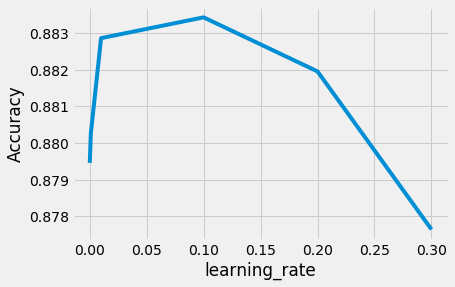

In [35]:
plt.plot(learning_rate, accuracy_scores)
plt.xlabel('learning_rate')
plt.ylabel('Accuracy')

In [36]:
gamma=range(0, 50, 1)

accuracy_scores = []

for gamm in gamma:
    clf = XGBClassifier(gamma=gamm)
    accuracy_scores.append(cross_val_score(clf, X_train, y_train, cv=10, scoring='accuracy').mean())

Text(0, 0.5, 'Accuracy')

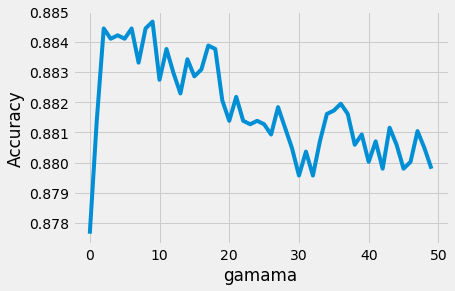

In [37]:
plt.plot(gamma, accuracy_scores)
plt.xlabel('gamama')
plt.ylabel('Accuracy')

In [38]:
colsample_bytree=[0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1]

accuracy_scores = []

for col in colsample_bytree:
    clf = XGBClassifier(colsample_bytree=col)
    accuracy_scores.append(cross_val_score(clf, X_train, y_train, cv=10, scoring='accuracy').mean())

Text(0, 0.5, 'Accuracy')

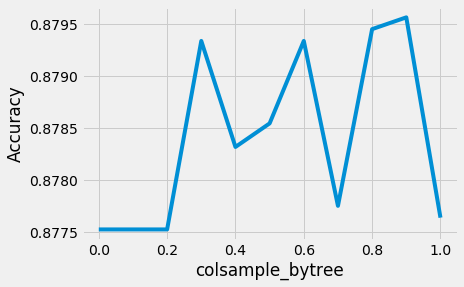

In [39]:
plt.plot(colsample_bytree, accuracy_scores)
plt.xlabel('colsample_bytree')
plt.ylabel('Accuracy')

In [40]:
clf = XGBClassifier(learning_rate=0.3,gamma=3,colsample_bytree=.8)
clf

XGBClassifier(base_score=None, booster=None, colsample_bylevel=None,
              colsample_bynode=None, colsample_bytree=0.8, gamma=3, gpu_id=None,
              importance_type='gain', interaction_constraints=None,
              learning_rate=0.3, max_delta_step=None, max_depth=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              objective='binary:logistic', random_state=None, reg_alpha=None,
              reg_lambda=None, scale_pos_weight=None, subsample=None,
              tree_method=None, validate_parameters=None, verbosity=None)

In [41]:
clf.fit(X_train,y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.8, gamma=3, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.3, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=0, num_parallel_tree=1,
              objective='binary:logistic', random_state=0, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [42]:
y_pred = clf.predict(X_test)
metrics.f1_score(y_pred, y_test.values), metrics.accuracy_score(y_pred, y_test.values)

(0.9003476245654692, 0.8811059907834101)